In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
#no need to train_test_split because we have a test.csv and a train.csv
from sklearn.preprocessing import OneHotEncoder # encode strings to binary
from sklearn.metrics import mean_absolute_error as mae # so we can see how wrong we are
from matplotlib import pyplot as plt # to graph and see what our model does (generally)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df.head()
#0 is male, 1 is female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#decision tree regression makes the most sense here because we're
#we're trying link a lot of complicated data together in a linear way.

model = tree.DecisionTreeRegressor()

#One-hot encoding the 'Sex' column
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Sex']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(input_features=['Sex']))
new_df = pd.concat([df.drop('Sex', axis=1), encoded_df], axis=1)

cleaned_df = new_df.dropna(axis=0)

cleaned_df.head()

encoded_test_data = encoder.fit_transform(df[['Sex']])
encoded_test_df = pd.DataFrame(encoded_data.toarray(), columns = encoder.get_feature_names_out(input_features=['Sex']))
new_test_df = pd.concat([df.drop('Sex', axis = 1), encoded_df], axis = 1)

cleaned_test_df = new_test_df.dropna(axis=0)

In [5]:

#creating inputs and targets for our decision tree regressor
inputs = cleaned_df[['Sex_female', 'Sex_male', 'Age']]
target = cleaned_df[['Survived']]

In [6]:
#training the model using the .fit() method
model.fit(inputs, target)

DecisionTreeRegressor()

In [7]:
test_inputs = cleaned_test_df[['Sex_female', 'Sex_male', 'Age']]
test_targets = cleaned_test_df[['Survived']]

predictions = model.predict(test_inputs)
mae(predictions, test_targets)

#from here, we can say that our model has a 9% error rate,
#which is pretty good!

0.09705958886286756

In [8]:
will_author_survive = pd.DataFrame(data = {'Sex_female': [0],
                                                 'Sex_male': [1],
                                                 'Age': [20],
                                                 })

print(model.predict(will_author_survive))
#i have a 0% chance of surviving the titanic

[0.]


# Predict your survival rate!

I built a function that allows users to input their survival rates.

In [9]:
def predict_survival():
    # Create a DataFrame with the input data
    sex_female = int(input("Is your sex female? (0 for no, 1 for yes)\n"))
    sex_male = 0
    if sex_female == 0:
        sex_male = 1
    age = int(input("Please input your age: "))
    input_data = pd.DataFrame({
        'Sex_female': [sex_female],
        'Sex_male': [sex_male],
        'Age': [age]
    })

    # Use the trained model to predict survival (0 or 1) for the input data
    prediction = model.predict(input_data)

    # Display the prediction
    print(f"Survival rate: {int(prediction*100)}%")

In [10]:
#predict_survival()

In [11]:
malesurvivalrate = []
x = []
femalesurvivalrate = []

for i in range(100):
    test1 = pd.DataFrame({
        'Sex_female': [0],
        'Sex_male': [1],
        'Age': [i]
    })
    test2 = pd.DataFrame({
        'Sex_female': [1],
        'Sex_male': [0],
        'Age': [i]
    })
    prediction = model.predict(test1)
    prediction2 = model.predict(test2)
    malesurvivalrate.append(prediction)
    femalesurvivalrate.append(prediction2)
    x.append(i)

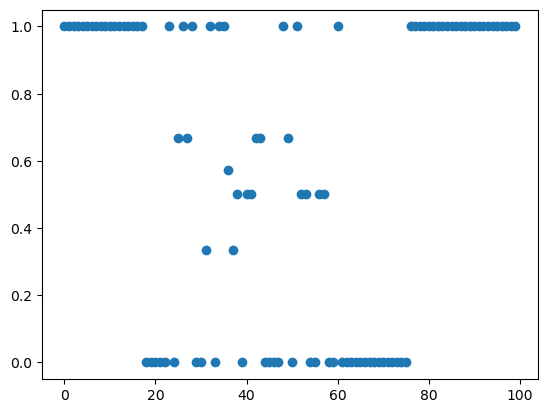

In [12]:
#x axis is age, y axis is how likely a male would survive.
plt.scatter(x, malesurvivalrate)

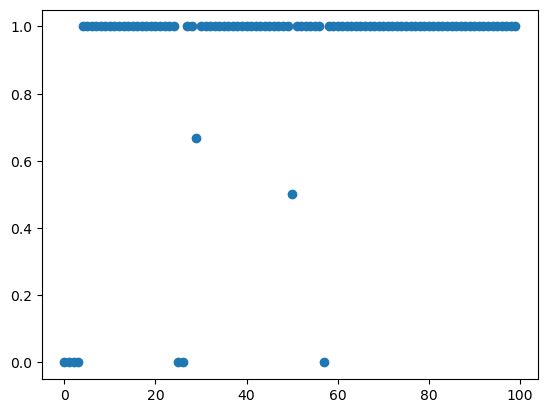

In [13]:
#x axis is age, y axis is how likely a female would survive.
plt.scatter(x, femalesurvivalrate)